In [1]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#set display options
pd.set_option("display.max_rows",193002)
pd.set_option("display.max_columns",33)

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's read the csv files
df1 = pd.read_csv("client_data.csv")
df2 = pd.read_csv("price_data.csv")

In [3]:
print(df1.shape)
print(df2.shape)

(14606, 26)
(193002, 8)


In [4]:
#Merge the two dataframes on id
df = df2.merge(df1, on='id')
#first five rows
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,0,630,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [5]:
#dimension of the dataset
df.shape

(175149, 33)

In [6]:
#general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   price_date                      175149 non-null  object 
 2   price_off_peak_var              175149 non-null  float64
 3   price_peak_var                  175149 non-null  float64
 4   price_mid_peak_var              175149 non-null  float64
 5   price_off_peak_fix              175149 non-null  float64
 6   price_peak_fix                  175149 non-null  float64
 7   price_mid_peak_fix              175149 non-null  float64
 8   channel_sales                   175149 non-null  object 
 9   cons_12m                        175149 non-null  int64  
 10  cons_gas_12m                    175149 non-null  int64  
 11  cons_last_month                 175149 non-null  int64  
 12  date_activ      

In [7]:
#change columns to the right type
df['price_date'] = pd.to_datetime(df['price_date'], format = '%Y-%m-%d')
df['date_activ'] =  pd.to_datetime(df['date_activ'], format = '%Y-%m-%d')
df['date_end'] =  pd.to_datetime(df['date_end'], format = '%Y-%m-%d')
df['date_modif_prod'] =  pd.to_datetime(df['date_modif_prod'], format = '%Y-%m-%d')
df['date_renewal'] =  pd.to_datetime(df['date_renewal'], format = '%Y-%m-%d')
df['nb_prod_act'] = df['nb_prod_act'].astype('Int64')
df['num_years_antig'] = df['num_years_antig'].astype('Int64')
df['churn'] = df['churn'].astype('Int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   price_date                      175149 non-null  datetime64[ns]
 2   price_off_peak_var              175149 non-null  float64       
 3   price_peak_var                  175149 non-null  float64       
 4   price_mid_peak_var              175149 non-null  float64       
 5   price_off_peak_fix              175149 non-null  float64       
 6   price_peak_fix                  175149 non-null  float64       
 7   price_mid_peak_fix              175149 non-null  float64       
 8   channel_sales                   175149 non-null  object        
 9   cons_12m                        175149 non-null  int64         
 10  cons_gas_12m                    175149 non-null  int64  

In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check missing values
df.isna().sum()

id                                0
price_date                        0
price_off_peak_var                0
price_peak_var                    0
price_mid_peak_var                0
price_off_peak_fix                0
price_peak_fix                    0
price_mid_peak_fix                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                 

In [11]:
#descriptive statistics for numerical variables
df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.0,175149.000000,175149.0,175149.000000,175149.0
mean,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,152.789831,24.566829,24.564223,1.2923,189.245305,4.998276,18.134896,0.097077
std,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,341.426992,20.234481,20.233588,0.70978,311.846765,1.611801,13.535809,0.296064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,3.300000,0.0
25%,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.0,50.710000,4.0,12.500000,0.0
50%,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,37.390000,21.640000,21.640000,1.0,112.500000,5.0,13.856000,0.0
75%,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,193.990000,29.880000,29.880000,1.0,243.000000,6.0,19.180000,0.0
max,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.0,24570.650000,13.0,320.000000,1.0


In [12]:
#statistics for object types
df.describe(include='object')

,id,channel_sales,has_gas,origin_up
count,175149,175149,175149,175149
unique,14606,8,2,6
top,038af19179925da21a25619c5a24b745,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,12,80971,143364,85086


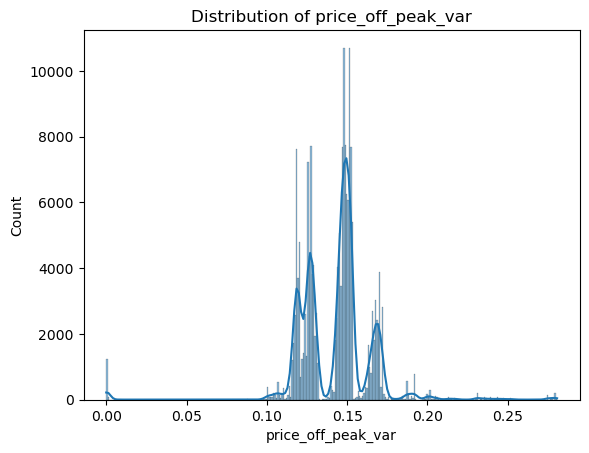

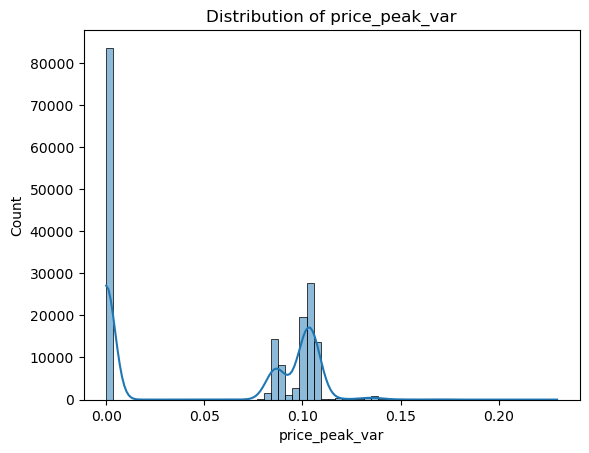

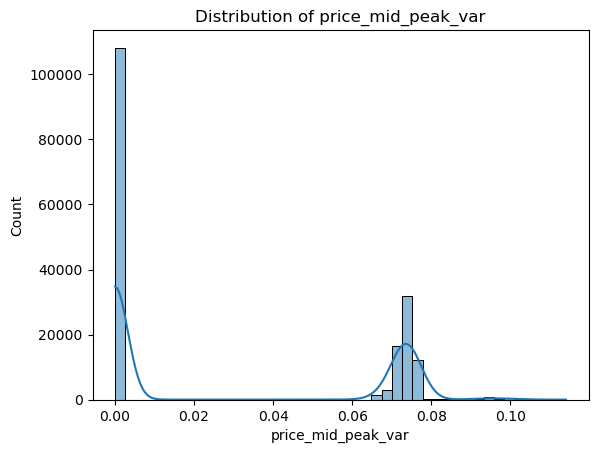

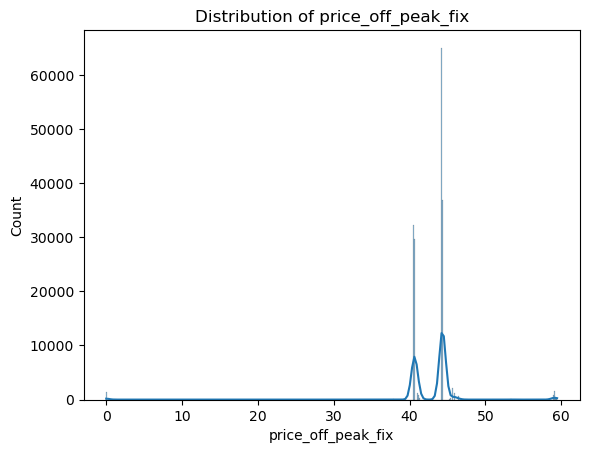

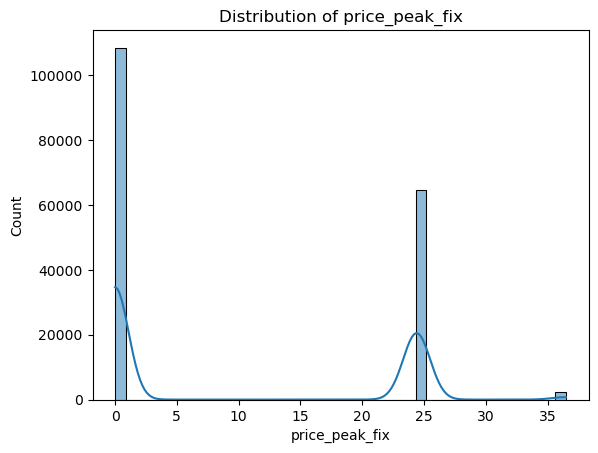

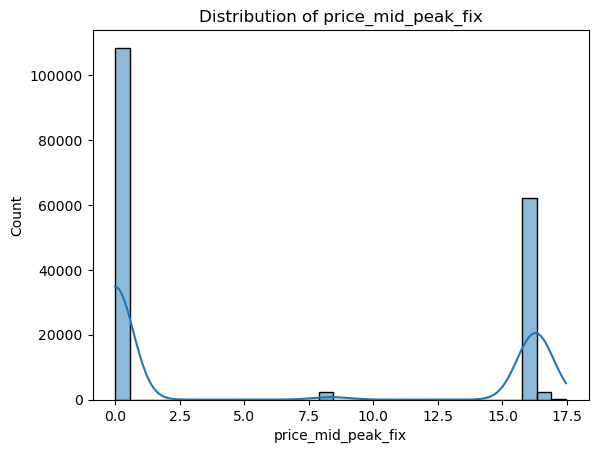

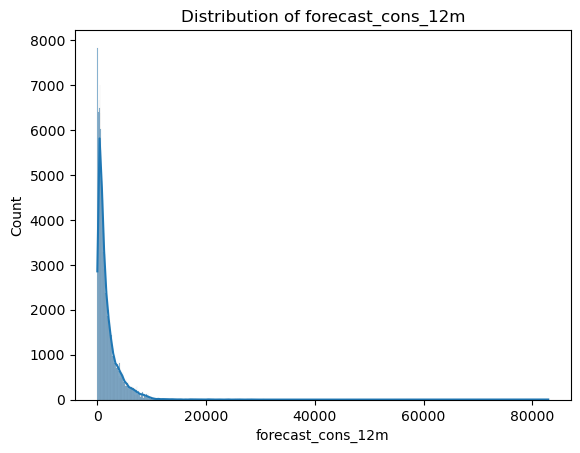

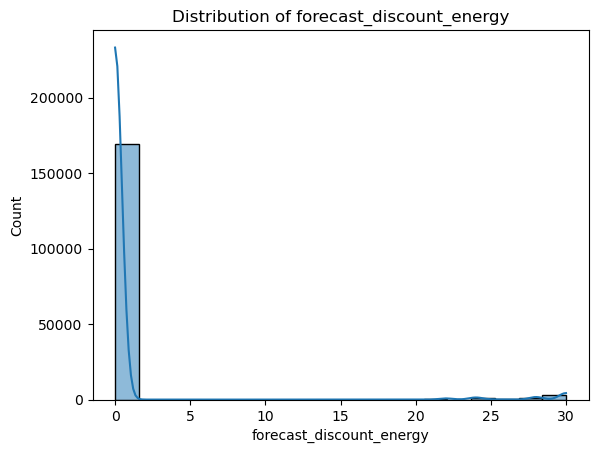

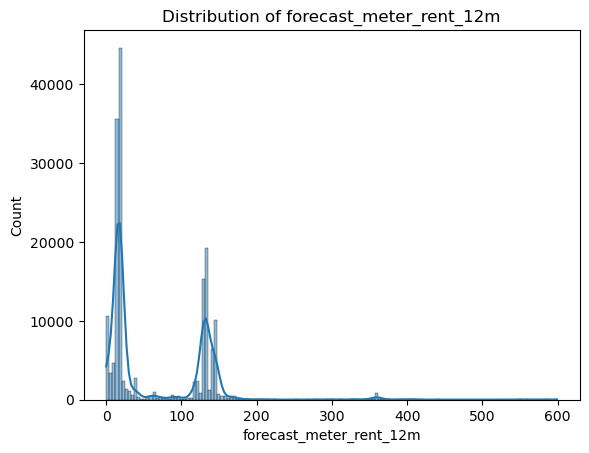

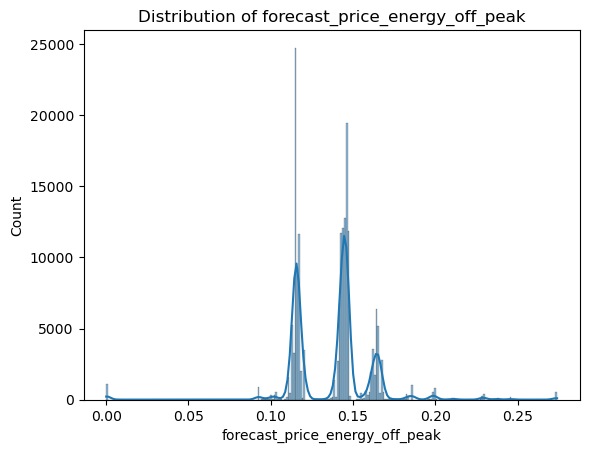

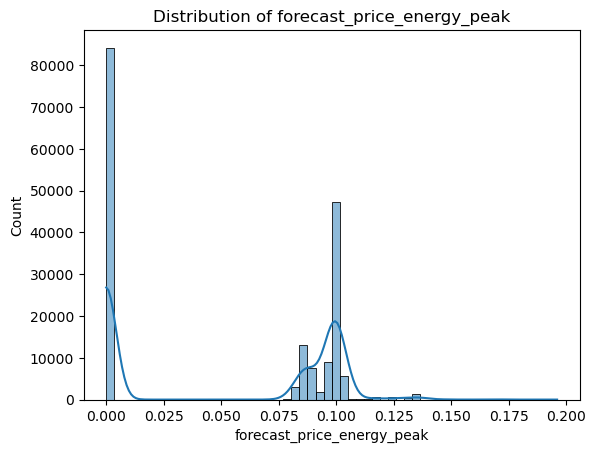

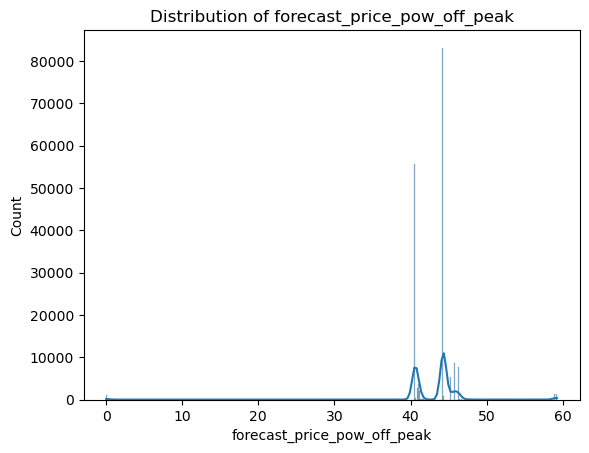

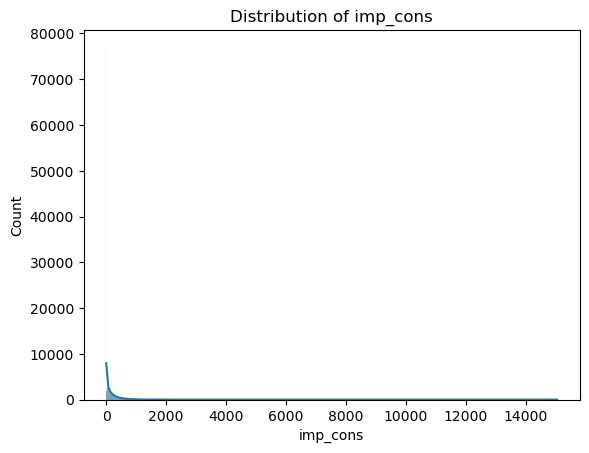

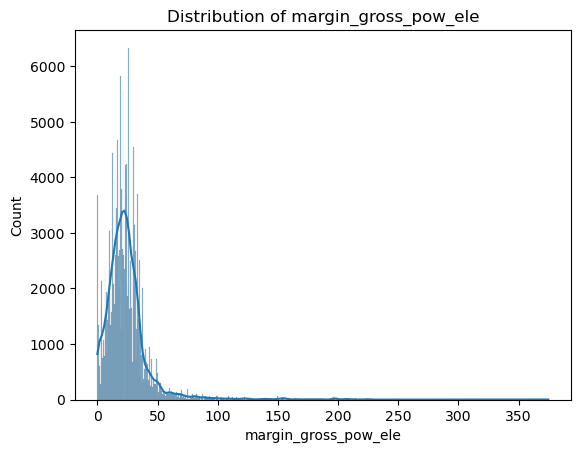

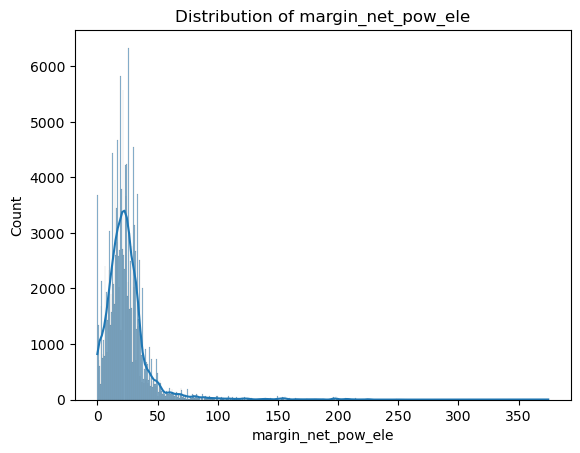

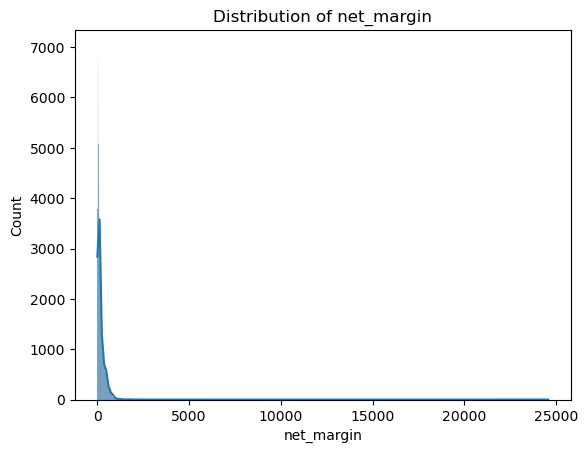

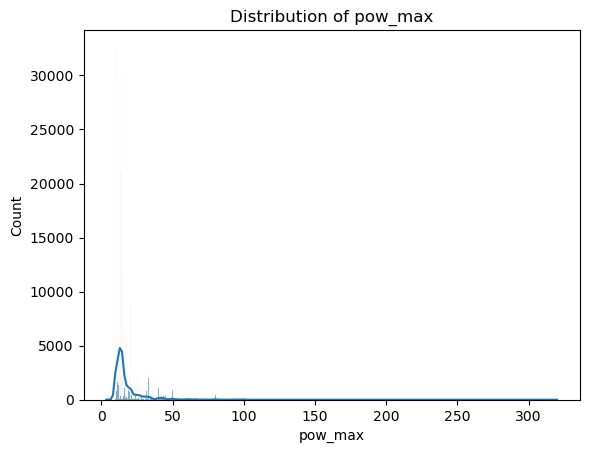

In [13]:
#distribution of the data (float types)
for i in df.select_dtypes(include='float'):
    plt.figure()
    sns.histplot(df[i], kde=True)
    plt.title(f"Distribution of {i}")

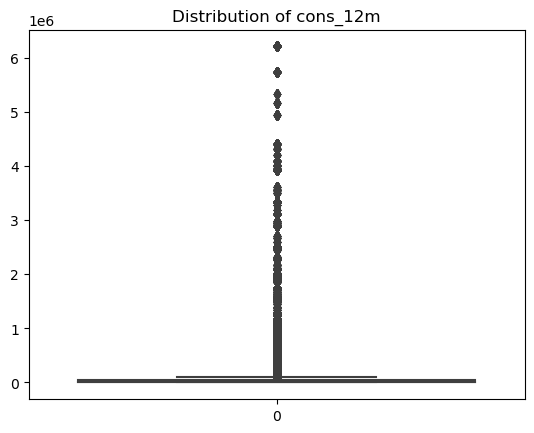

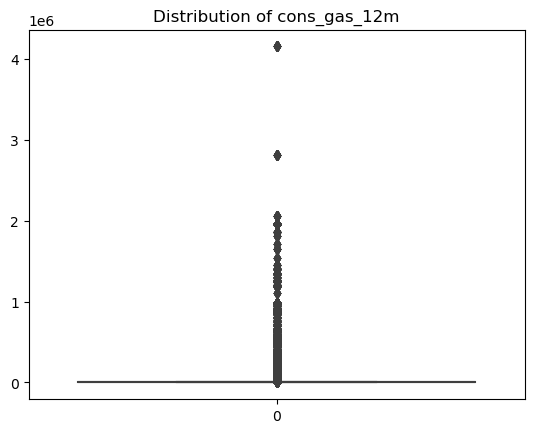

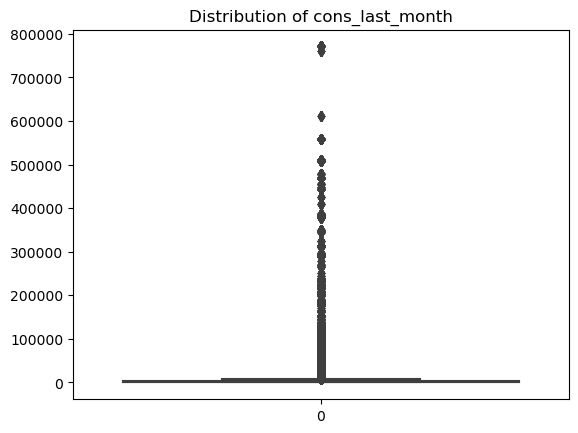

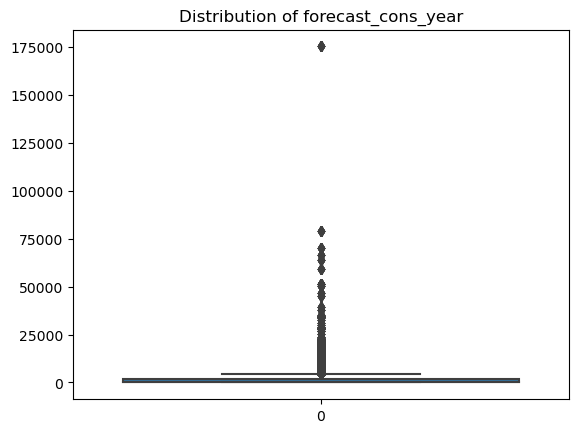

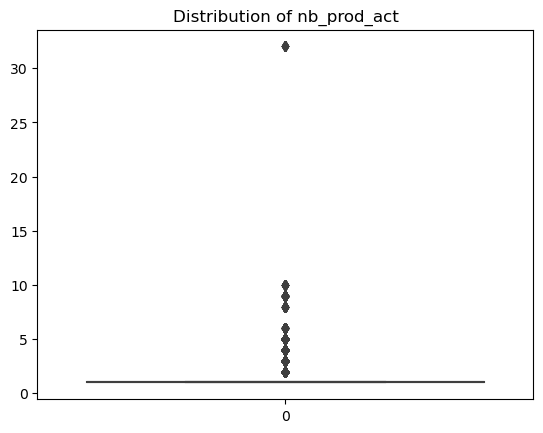

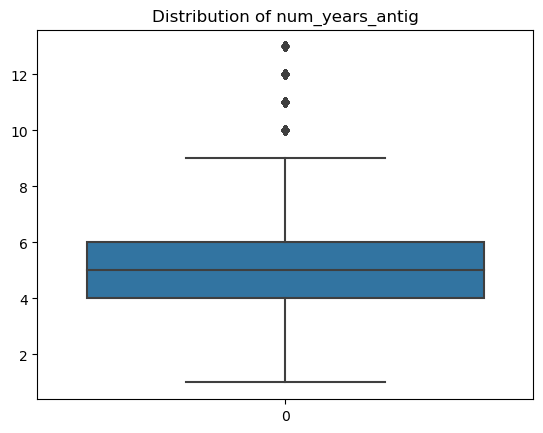

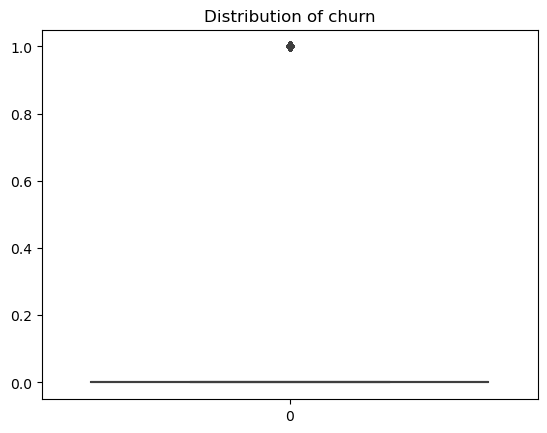

In [14]:
#distribution of the data (int types)
for i in df.select_dtypes(include='int'):
    plt.figure()
    sns.boxplot(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()

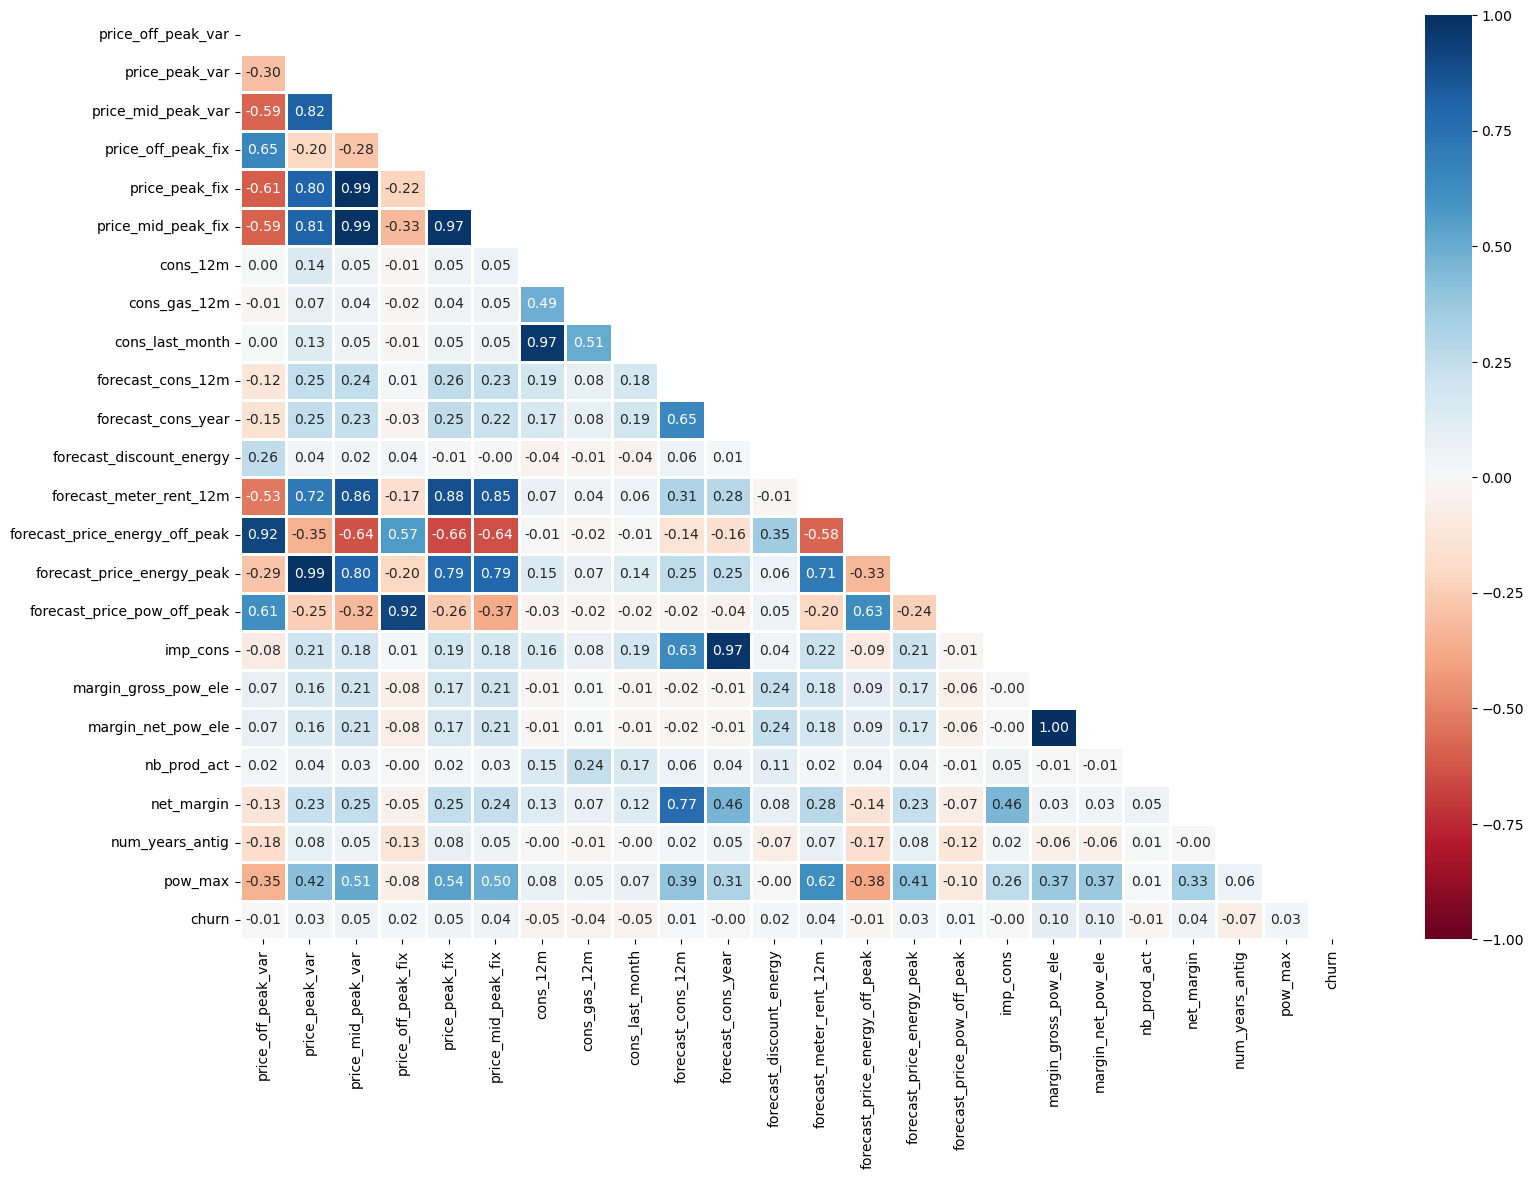

In [15]:
#Relationship between variables
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, center=0, cmap ="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

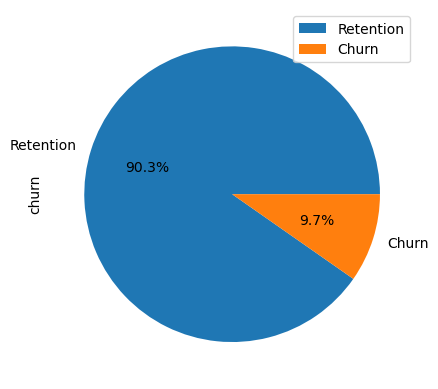

In [16]:
#Let's visualize the distribution of the target variabe churn
labels = {0: 'Retention', 1: 'Churn'}

# Get the value counts
value_counts = df.churn.value_counts()

# Map the labels based on the value counts index
mapped_labels = [labels[i] for i in value_counts.index]

# Plot the pie chart
value_counts.plot.pie(autopct='%1.1f%%', labels=mapped_labels)
#plt.title('Distribution of the Target Variable')
plt.legend(mapped_labels)
plt.savefig('target.png')
plt.show()

In [17]:
#relationship between variables'
price = df[['price_date','price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']]
consumption = df[['cons_12m','cons_gas_12m','cons_last_month']]
forecast = df[[ "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak"]]
margin = df[['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
retention = df[df['churn'] == 0]
churn =  df[df['churn'] == 1]


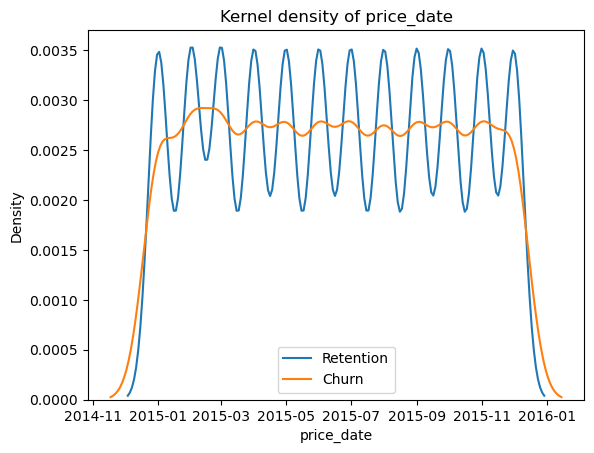

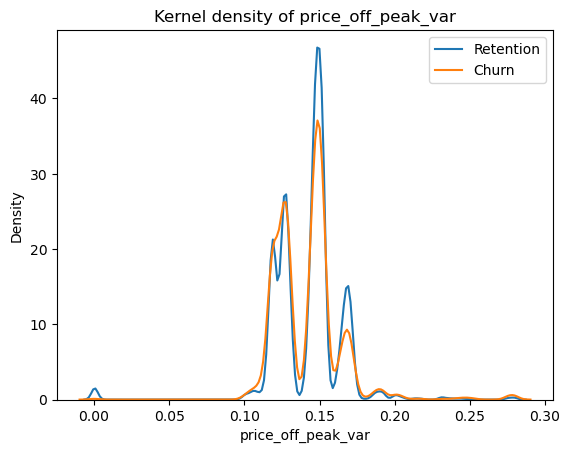

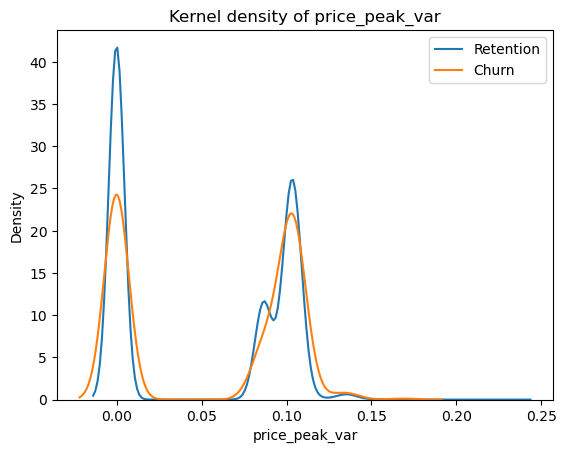

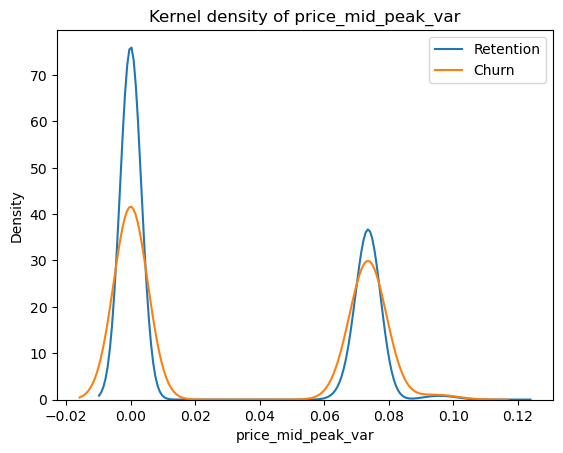

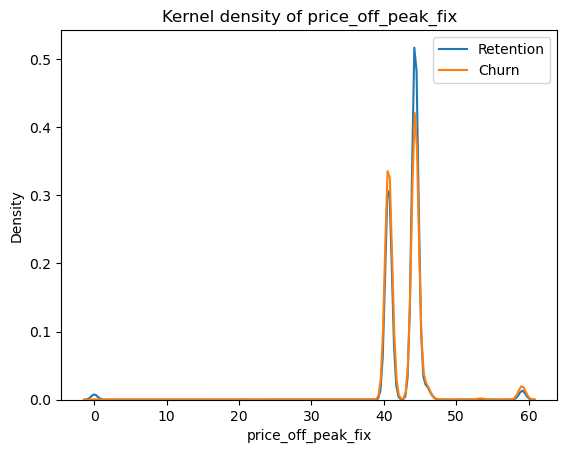

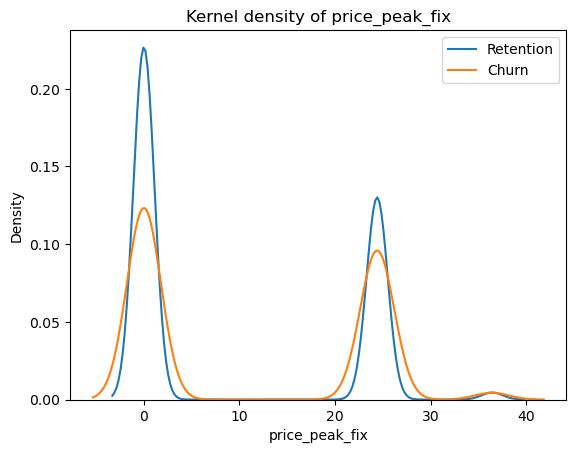

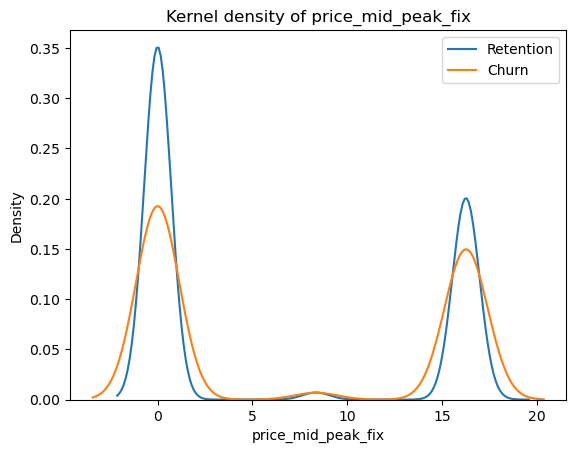

In [18]:
for p in price:
    plt.figure()
    sns.kdeplot(retention[p], label='Retention')
    sns.kdeplot(churn[p], label='Churn')
    plt.title(f'Kernel density of {p}')
    plt.legend()

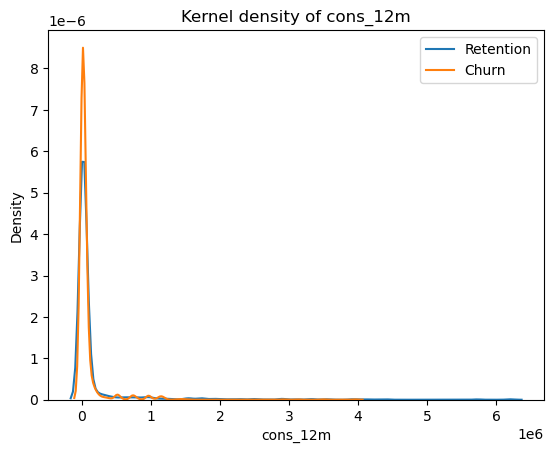

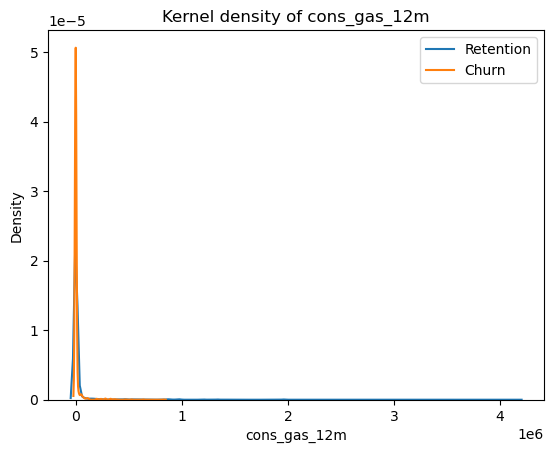

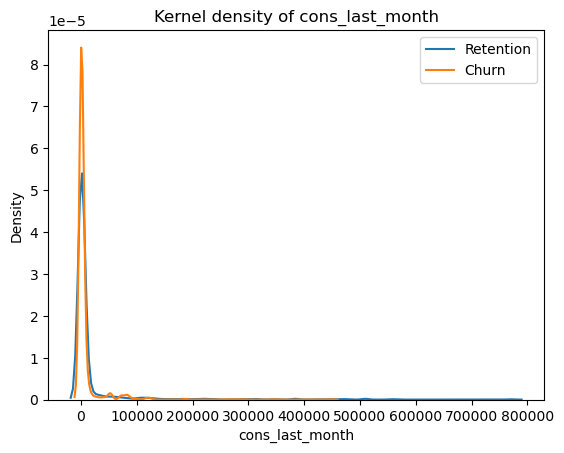

In [19]:
for c in consumption:
    plt.figure()
    sns.kdeplot(retention[c], label='Retention')
    sns.kdeplot(churn[c], label='Churn')
    plt.title(f'Kernel density of {c}')
    plt.legend()

In [ ]:
for f in forecast:
    plt.figure()
    sns.histplot(retention[f], label='Retention')
    sns.histplot(churn[f], label='Churn')
    plt.title(f'histogram of {f}')
    plt.legend()

In [ ]:
for m in margin:
    plt.figure()
    sns.kdeplot(retention[m], label='Retention')
    sns.kdeplot(churn[m], label='Churn')
    plt.title(f'Kernel density of {m}')
    plt.legend()

In [ ]:
#Relationship between Target and categorical variables
cat = df[['channel_sales','origin_up','churn','has_gas']]
for ct in cat.select_dtypes(include='object'):
    plt.figure(figsize=(10,3))
    sns.heatmap(pd.crosstab(cat['churn'],cat[ct]), annot=True, fmt=".2f")
    plt.title(f'Crosstab of {ct}')

In [ ]:
df.groupby('churn')['channel_sales'].value_counts(normalize=True)

# SUMMARY OF EXPLORATORY DATA ANALYSIS
The price dataset contains 8 columns and 193002 row and the client dataset contains 14606 rows and 26 columns.I merged them on the client company identifier using an inner join .I realized that the variable activity_new specified in the data dictionary was not provided.Here are the steps I followed to explore our data:
  - After Merging the two dataset I obtained 33 columns with 175149 rows.
  - I displayed the first five rows and the general informations about the new dataset.
  - I used the most suitable data type to impute some of the varibles
  - The dataset doesn't have duplicates or missing values values so I procceeded by printing the descriptive statistic for both numerical and categorical variables.Here are some insights gained: The dataset has a lot of outliers, we have 14606 unique companies, 8 channels sales and 6 unique code of the electricity campaign the customer first subscribed to.
   - I created charts to visualize numerical variables and the target variable. the numerical variables contains outliers and are not normally distributed and most of them are right skewed.I also ploted the heatmap to see the relationship between each variable
   - The target variable is imbalanced, we have 90.3% retention and 9.7% churn 
   - The three channels where people churn from most are: foosdfpfkusacimwkcsosbicdxkicaua, MISSING and usilxuppasemubllopkaafesmlibmsdf
   - The three origin up wher people churn from most are: lxidpiddsbxsbosboudacockeimpuepw, ldkssxwpmemidmecebumciepifcamkci and kamkkxfxxuwbdslkwifmmcsiusiuosws 
   - the kdeplot and the hisplot show us the density of the churn values indicating how relatively likely it is to observe data points near that value compared to other points; A higher density means a higher concentration of data points around that value
